# Data Exploration with Additional Malignant Dataset

In [2]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

In [39]:
!ls ../data/

Additional_malignant
ISIC_2019_512x512
ISIC_2019_512x512.csv
ISIC_2020_Training_GroundTruth.csv
ISIC_2020_Training_JPEG
add_train_malig_2.csv


## ISIC 2019 

In [35]:
# ISIC 2019 dataset with directory path:
path2019 = '../data/ISIC_2019_512x512/'
df2019 = pd.read_csv('../data/ISIC_2019_512x512.csv')
df2019

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767
...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,-1,female,85.0,head/neck,BCC,benign,0,19,1024,1024
25327,ISIC_0073248,-1,male,65.0,anterior torso,BKL,benign,0,7,1024,1024
25328,ISIC_0073249,-1,male,70.0,lower extremity,MEL,malignant,1,9,1024,1024
25329,ISIC_0073251,-1,female,55.0,palms/soles,NV,benign,0,15,1024,1024


In [41]:
# add image's path directory to the data 
df2019['path'] = path2019 + df2019['image_name'] + ".jpg"
df2019

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,path
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767,../data/ISIC_2019_512x512/ISIC_0000000.jpg
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767,../data/ISIC_2019_512x512/ISIC_0000001.jpg
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767,../data/ISIC_2019_512x512/ISIC_0000002.jpg
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767,../data/ISIC_2019_512x512/ISIC_0000003.jpg
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767,../data/ISIC_2019_512x512/ISIC_0000004.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,-1,female,85.0,head/neck,BCC,benign,0,19,1024,1024,../data/ISIC_2019_512x512/ISIC_0073247.jpg
25327,ISIC_0073248,-1,male,65.0,anterior torso,BKL,benign,0,7,1024,1024,../data/ISIC_2019_512x512/ISIC_0073248.jpg
25328,ISIC_0073249,-1,male,70.0,lower extremity,MEL,malignant,1,9,1024,1024,../data/ISIC_2019_512x512/ISIC_0073249.jpg
25329,ISIC_0073251,-1,female,55.0,palms/soles,NV,benign,0,15,1024,1024,../data/ISIC_2019_512x512/ISIC_0073251.jpg


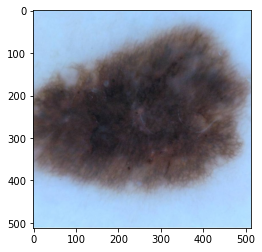

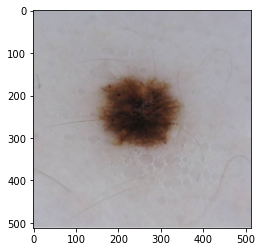

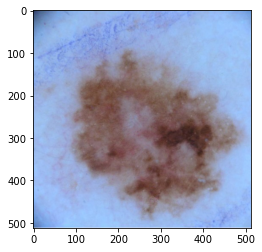

In [42]:
# look into 3 image samples:
for im in df2019['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## ISIC 2020

In [36]:
# ISIC 2020 dataset with directory path:
path2020 = '../data/ISIC_2020_Training_JPEG/'
df2020 = pd.read_csv('../data/ISIC_2020_Training_GroundTruth.csv')
df2020

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [43]:
# add image's path directory to the data 
df2020['path'] = path2020 + df2020['image_name'] + ".jpg"
df2020

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg
...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999134.jpg
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999320.jpg
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999515.jpg
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999666.jpg


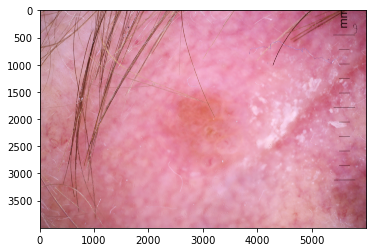

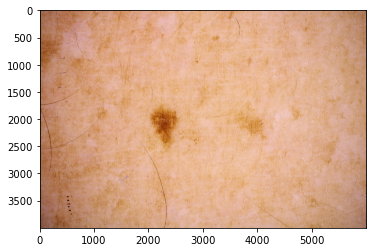

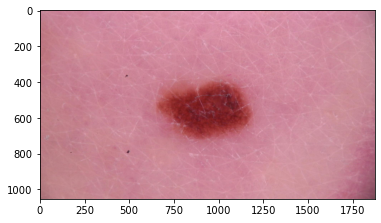

In [44]:
# look into 3 image samples:
for im in df2020['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## ISIC ARCHIVE DATASET

In [40]:
# dataset is from :https://www.kaggle.com/cdeotte/malignant-v2-1024x1024?select=jpeg1024
# Additional malignant dataset with directory path:
pathAdd = '../data/Additional_malignant/'
dfAdd = pd.read_csv('../data/add_train_malig_2.csv')
dfAdd

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,width,height,source,ext,tfrecord
0,ISIC_0000070,-1,male,25.0,anterior torso,melanoma,malignant,1,1022,767,UDA-1,jpg,15
1,ISIC_0000076,-1,male,55.0,posterior torso,melanoma,malignant,1,1504,1129,UDA-1,jpg,15
2,ISIC_0000144,-1,NaN,NaN,NaN,melanoma,malignant,1,2048,1536,UDA-1,jpg,15
3,ISIC_0000158,-1,female,30.0,upper extremity,melanoma,malignant,1,722,542,UDA-1,jpg,15
4,ISIC_0000284,-1,male,80.0,head/neck,melanoma,malignant,1,1024,768,UDA-1,jpg,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
576,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
577,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
578,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,4288,2848,2018 JID Editorial Images,jpg,29


In [45]:
# add image's path directory to the data 
dfAdd['path'] = pathAdd + dfAdd['image_name'] + ".jpg"
dfAdd

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,width,height,source,ext,tfrecord,path
0,ISIC_0000070,-1,male,25.0,anterior torso,melanoma,malignant,1,1022,767,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000070.jpg
1,ISIC_0000076,-1,male,55.0,posterior torso,melanoma,malignant,1,1504,1129,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000076.jpg
2,ISIC_0000144,-1,NaN,NaN,NaN,melanoma,malignant,1,2048,1536,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000144.jpg
3,ISIC_0000158,-1,female,30.0,upper extremity,melanoma,malignant,1,722,542,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000158.jpg
4,ISIC_0000284,-1,male,80.0,head/neck,melanoma,malignant,1,1024,768,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000284.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024302.jpg
576,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024303.jpg
577,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024304.jpg
578,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,4288,2848,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024305.jpg


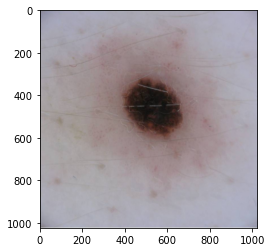

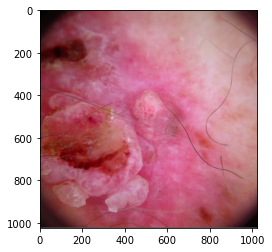

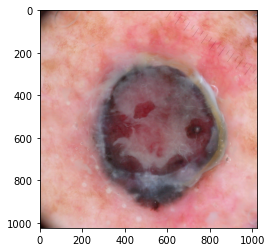

In [46]:
# look into 3 image samples:
for im in dfAdd['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## Final Dataset

In [52]:
df_final=pd.concat([df2019, df2020, dfAdd], axis=0, ignore_index= True)
df_final

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,path,source,ext
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4.0,1022.0,767.0,../data/ISIC_2019_512x512/ISIC_0000000.jpg,NaN,NaN
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18.0,1022.0,767.0,../data/ISIC_2019_512x512/ISIC_0000001.jpg,NaN,NaN
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0.0,1022.0,767.0,../data/ISIC_2019_512x512/ISIC_0000002.jpg,NaN,NaN
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24.0,1022.0,767.0,../data/ISIC_2019_512x512/ISIC_0000003.jpg,NaN,NaN
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14.0,1022.0,767.0,../data/ISIC_2019_512x512/ISIC_0000004.jpg,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59032,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,29.0,3008.0,2000.0,../data/Additional_malignant/ISIC_0024302.jpg,2018 JID Editorial Images,jpg
59033,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,29.0,3008.0,2000.0,../data/Additional_malignant/ISIC_0024303.jpg,2018 JID Editorial Images,jpg
59034,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,29.0,3008.0,2000.0,../data/Additional_malignant/ISIC_0024304.jpg,2018 JID Editorial Images,jpg
59035,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,29.0,4288.0,2848.0,../data/Additional_malignant/ISIC_0024305.jpg,2018 JID Editorial Images,jpg


In [53]:
df_final['benign_malignant'].value_counts()

benign       53351
malignant     5686
Name: benign_malignant, dtype: int64